In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from dense_image_aligment import show_data, image_aligment_method, read_as_grayscale
from dense_image_aligment import save_aligment_progress, read_as_colored, show_data
from dense_image_aligment.transformations.translation import TranslationTransformation

In [2]:
def create_simple_gauss(mu, sigma, shape):
    x = np.linspace(0, 1, shape[0])
    y = np.linspace(0, 1, shape[1])
    
    xx, yy = np.meshgrid(x, y, indexing='xy')
    
    z = np.exp(-( (xx - mu[0])**2 +  (yy - mu[1])**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return z

In [3]:
template = create_simple_gauss([0.5, 0.5], 0.1, [100, 100])
image = create_simple_gauss([0.5, 0.5], 0.1, [100, 100])

In [18]:
method, params = image_aligment_method(key='forward_additive')
params['alpha'] = 1.0
params['max_iterations'] = 100
params['p_init'] = np.array([37., 0.])
params['convergence_threshold'] = 1e-8

transform = TranslationTransformation(params['p_init'])

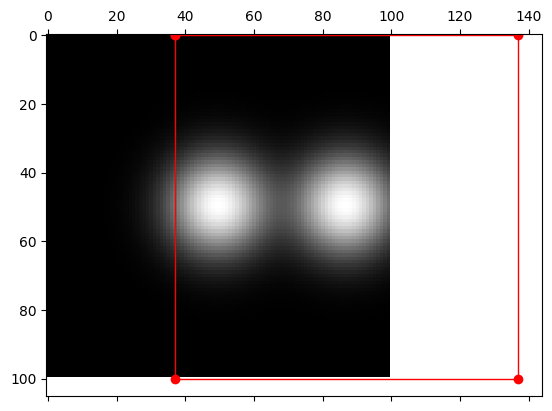

In [19]:
show_data(
    image=image, 
    template=template, 
    coords_transform=transform
)

In [20]:
ps = method(
    image=image,
    template=template,
    coord_transform=transform,
    **params
)

iteration: 99, |∇p|=0.00000: 100%|██████████| 100/100 [00:08<00:00, 12.03it/s]


In [21]:
ps[-1]

array([ 3.73199393e+01, -8.22025939e-14])

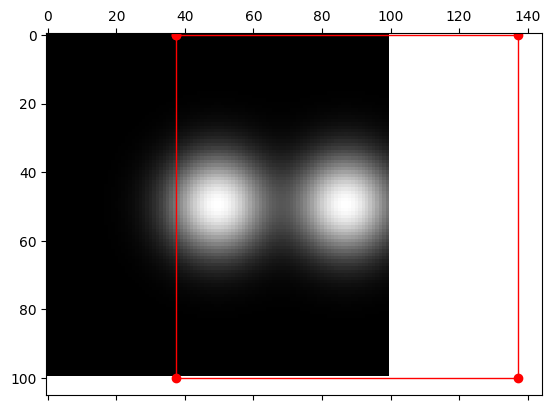

In [22]:
transform.p = ps[-1]

show_data(
    image=image, 
    template=template, 
    coords_transform=transform
)